In [1]:
# чтобы предупреждения глаза не мазолили
import warnings
warnings.filterwarnings('ignore')

import torch
import pandas as pd

import my_dataset
import train
import model

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


In [3]:
DATASET_PATH = 'dataset/'

f0_channel_1, f0_channel_2, f0_channel_3 = my_dataset.load_data(DATASET_PATH + '0.txt')

f01_channel_1, f01_channel_2, f01_channel_3 = my_dataset.load_data(DATASET_PATH + '0_1.txt')
f02_channel_1, f02_channel_2, f02_channel_3 = my_dataset.load_data(DATASET_PATH + '0_2.txt')

f1_channel_1, f1_channel_2, f1_channel_3 = my_dataset.load_data(DATASET_PATH + '1.txt')
f11_channel_1, f11_channel_2, f11_channel_3 = my_dataset.load_data(DATASET_PATH + '1_1.txt')
f12_channel_1, f12_channel_2, f12_channel_3 = my_dataset.load_data(DATASET_PATH + '1_2.txt')

f2_channel_1, f2_channel_2, f2_channel_3 = my_dataset.load_data(DATASET_PATH + '2.txt')
f21_channel_1, f21_channel_2, f21_channel_3 = my_dataset.load_data(DATASET_PATH + '2_1.txt')
f22_channel_1, f22_channel_2, f22_channel_3 = my_dataset.load_data(DATASET_PATH + '2_2.txt')

f3_channel_1, f3_channel_2, f3_channel_3 = my_dataset.load_data(DATASET_PATH + '4.txt')
f31_channel_1, f31_channel_2, f31_channel_3 = my_dataset.load_data(DATASET_PATH + '4_1.txt')
f32_channel_1, f32_channel_2, f32_channel_3 = my_dataset.load_data(DATASET_PATH + '4_2.txt')

f4_channel_1, f4_channel_2, f4_channel_3 = my_dataset.load_data(DATASET_PATH + '6.txt')
f41_channel_1, f41_channel_2, f41_channel_3 = my_dataset.load_data(DATASET_PATH + '6_1.txt')
f42_channel_1, f42_channel_2, f42_channel_3 = my_dataset.load_data(DATASET_PATH + '6_2.txt')

f5_channel_1, f5_channel_2, f5_channel_3 = my_dataset.load_data(DATASET_PATH + '10.txt')
f51_channel_1, f51_channel_2, f51_channel_3 = my_dataset.load_data(DATASET_PATH + '10_1.txt')
f52_channel_1, f52_channel_2, f52_channel_3 = my_dataset.load_data(DATASET_PATH + '10_2.txt')

f6_channel_1, f6_channel_2, f6_channel_3 = my_dataset.load_data(DATASET_PATH + '15.txt')
f61_channel_1, f61_channel_2, f61_channel_3 = my_dataset.load_data(DATASET_PATH + '15_1.txt')
f62_channel_1, f62_channel_2, f62_channel_3 = my_dataset.load_data(DATASET_PATH + '15_2.txt')

f7_channel_1, f7_channel_2, f7_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль.txt')
f71_channel_1, f71_channel_2, f71_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_1.txt')
f72_channel_1, f72_channel_2, f72_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_2.txt')
f73_channel_1, f73_channel_2, f73_channel_3 = my_dataset.load_data(DATASET_PATH + 'фасоль_3.txt')


In [4]:
len(f1_channel_1)

68000

In [5]:
from dataset_processing import split_data_to_dataframe
NUM_CLASSES = 8
FRAME = 5000
STRIDE = 200
SMOOTHING = 5

f0_dataset = split_data_to_dataframe(f0_channel_1, f0_channel_2, f0_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f01_dataset = split_data_to_dataframe(f01_channel_1, f01_channel_2, f01_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f02_dataset = split_data_to_dataframe(f02_channel_1, f02_channel_2, f02_channel_3, label=0, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f1_dataset = split_data_to_dataframe(f1_channel_1, f1_channel_2, f1_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f11_dataset = split_data_to_dataframe(f11_channel_1, f11_channel_2, f11_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f12_dataset = split_data_to_dataframe(f12_channel_1, f12_channel_2, f12_channel_3, label=1, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f2_dataset = split_data_to_dataframe(f2_channel_1, f2_channel_2, f2_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f21_dataset = split_data_to_dataframe(f21_channel_1, f21_channel_2, f21_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f22_dataset = split_data_to_dataframe(f22_channel_1, f22_channel_2, f22_channel_3, label=2, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f3_dataset = split_data_to_dataframe(f3_channel_1, f3_channel_2, f3_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f31_dataset = split_data_to_dataframe(f31_channel_1, f31_channel_2, f31_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f32_dataset = split_data_to_dataframe(f32_channel_1, f32_channel_2, f32_channel_3, label=3, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f4_dataset = split_data_to_dataframe(f4_channel_1, f4_channel_2, f4_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f41_dataset = split_data_to_dataframe(f41_channel_1, f41_channel_2, f41_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f42_dataset = split_data_to_dataframe(f42_channel_1, f42_channel_2, f42_channel_3, label=4, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f5_dataset = split_data_to_dataframe(f5_channel_1, f5_channel_2, f5_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f51_dataset = split_data_to_dataframe(f51_channel_1, f51_channel_2, f51_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f52_dataset = split_data_to_dataframe(f52_channel_1, f52_channel_2, f52_channel_3, label=5, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f6_dataset = split_data_to_dataframe(f6_channel_1, f6_channel_2, f6_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f61_dataset = split_data_to_dataframe(f61_channel_1, f61_channel_2, f61_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f62_dataset = split_data_to_dataframe(f62_channel_1, f62_channel_2, f62_channel_3, label=6, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)

f7_dataset = split_data_to_dataframe(f7_channel_1, f7_channel_2, f7_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f71_dataset = split_data_to_dataframe(f71_channel_1, f71_channel_2, f71_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f72_dataset = split_data_to_dataframe(f72_channel_1, f72_channel_2, f72_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING)
f73_dataset = split_data_to_dataframe(f73_channel_1, f73_channel_2, f73_channel_3, label=7, frame_size=FRAME, frame_stride=STRIDE, smoothing_window=SMOOTHING) 




In [6]:
f6_dataset

,data,label
0,"[286.4706571177753, 26.210858119110767, 27.826...",6
1,"[291.33027514598405, 34.41716036341983, 32.923...",6
2,"[288.1201234097439, 29.48902876207091, 32.7055...",6
3,"[285.9345278896432, 30.20750612111439, 39.4247...",6
4,"[284.4548202916228, 28.708656139127633, 38.646...",6
...,...,...
319,"[283.23132445409107, 16.351233556557997, 19.64...",6
320,"[295.8508839868966, 25.98991094432002, 23.6233...",6
321,"[280.69819407879356, 15.071651375289377, 16.89...",6
322,"[279.20424100936333, 14.436082213492487, 15.63...",6


In [7]:

final_dataset = pd.concat([f0_dataset, f01_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f02_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f1_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f11_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f12_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f2_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f21_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f22_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f3_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f31_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f32_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f4_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f41_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f42_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f5_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f51_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f52_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f6_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f61_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f62_dataset], ignore_index=True)

final_dataset = pd.concat([final_dataset, f7_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f71_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f72_dataset], ignore_index=True)
final_dataset = pd.concat([final_dataset, f73_dataset], ignore_index=True)


In [8]:
final_dataset

,data,label
0,"[272.7735104303092, 4.612720136425836, 3.92176...",0
1,"[272.4400728969948, 4.273573931349854, 3.46260...",0
2,"[273.488505318104, 4.992335283853877, 4.554553...",0
3,"[271.42833023125434, 4.769106382441608, 3.5994...",0
4,"[271.8745256589793, 4.583191777470702, 3.14516...",0
...,...,...
6715,"[277.3837451838244, 8.020900676441975, 14.3265...",7
6716,"[278.3238029913989, 9.325402159080983, 16.0385...",7
6717,"[276.1920023270888, 7.296967573203001, 14.1163...",7
6718,"[278.3921317279089, 8.568939930817656, 14.0841...",7


In [9]:
train_dataset, valid_dataset, test_dataset = my_dataset.train_val_test_split(final_dataset)

In [10]:
train_dataset

,data,label
6457,"[279.2090803607845, 10.637153768509709, 17.353...",7
5655,"[282.51772053610534, 16.043292877195675, 20.93...",6
4963,"[289.9237965370889, 28.392604082918776, 29.549...",5
6036,"[292.99958370794445, 23.23402872399652, 34.119...",6
1454,"[292.1615883284407, 21.606674227756727, 20.307...",1
...,...,...
1252,"[279.29452230121865, 12.65173668904948, 15.645...",1
4118,"[284.27134301547756, 26.80519491542904, 28.949...",4
524,"[272.9494976719244, 3.4937420937549755, 5.8164...",0
2070,"[276.2952662808551, 14.460553169718324, 15.424...",2


In [11]:
train_dataset = train_dataset.reset_index(drop=True)
valid_dataset = valid_dataset.reset_index(drop=True)
test_dataset = test_dataset.reset_index(drop=True)

In [12]:
from custom_dataset import CustomDataset

train = CustomDataset(train_dataset)
valid = CustomDataset(valid_dataset)
test = CustomDataset(test_dataset)

In [13]:
print(train.data_frame)

                                                   data  label
0     [279.2090803607845, 10.637153768509709, 17.353...      7
1     [282.51772053610534, 16.043292877195675, 20.93...      6
2     [289.9237965370889, 28.392604082918776, 29.549...      5
3     [292.99958370794445, 23.23402872399652, 34.119...      6
4     [292.1615883284407, 21.606674227756727, 20.307...      1
...                                                 ...    ...
6043  [279.29452230121865, 12.65173668904948, 15.645...      1
6044  [284.27134301547756, 26.80519491542904, 28.949...      4
6045  [272.9494976719244, 3.4937420937549755, 5.8164...      0
6046  [276.2952662808551, 14.460553169718324, 15.424...      2
6047  [278.77614364503086, 31.846866890449792, 45.68...      4

[6048 rows x 2 columns]


In [14]:
from torch.utils.data import DataLoader

batch_size = 32 # размер батча
train = DataLoader(train, batch_size=batch_size, shuffle=True)
valid = DataLoader(valid, batch_size=batch_size, shuffle=False)
test = DataLoader(test, batch_size=batch_size, shuffle=False)


In [15]:
print(len(train))
for (data, label) in train:
    print(data.shape)
    print(label.shape)
    break

189
torch.Size([32, 1, 1, 3000])
torch.Size([32, 1])


In [16]:
import model
from train import train_model

net = model.Perceptron(3000, 8).to(device)

loss_history, best_model = train_model(train, valid, net, epochs=100, device=device)

Epoch [0/100], loss = 1.9289 acc_val = 0.4494
Epoch [1/100], loss = 1.7469 acc_val = 0.5089
Epoch [2/100], loss = 1.6958 acc_val = 0.5863
Epoch [3/100], loss = 1.6510 acc_val = 0.4315
Epoch [4/100], loss = 1.6333 acc_val = 0.6429
Epoch [5/100], loss = 1.6163 acc_val = 0.5744
Epoch [6/100], loss = 1.5942 acc_val = 0.6488
Epoch [7/100], loss = 1.5768 acc_val = 0.6756
Epoch [8/100], loss = 1.5636 acc_val = 0.6845
Epoch [9/100], loss = 1.5560 acc_val = 0.6458
Epoch [10/100], loss = 1.5734 acc_val = 0.7143
Epoch [11/100], loss = 1.5419 acc_val = 0.7232
Epoch [12/100], loss = 1.5419 acc_val = 0.7054
Epoch [13/100], loss = 1.5498 acc_val = 0.7173
Epoch [14/100], loss = 1.5311 acc_val = 0.7351
Epoch [15/100], loss = 1.5280 acc_val = 0.7440
Epoch [16/100], loss = 1.5175 acc_val = 0.7292
Epoch [17/100], loss = 1.5189 acc_val = 0.7530
Epoch [18/100], loss = 1.5039 acc_val = 0.6905
Epoch [19/100], loss = 1.5058 acc_val = 0.7500
Epoch [20/100], loss = 1.4967 acc_val = 0.7798
Epoch [21/100], loss = 

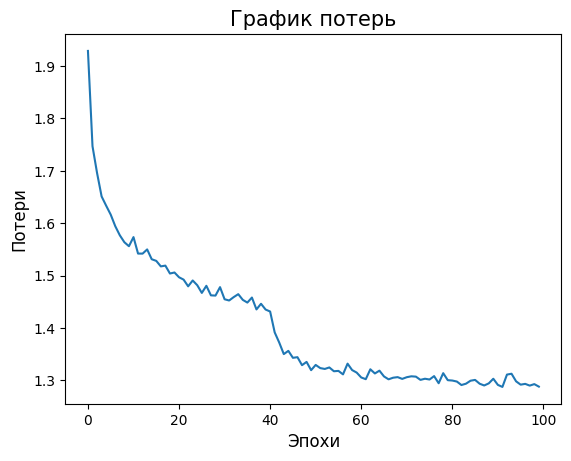

In [17]:
from matplotlib import pyplot as plt

plt.title('График потерь',fontsize=15)
plt.xlabel('Эпохи',fontsize=12)
plt.ylabel('Потери',fontsize=12)
plt.plot(loss_history)

plt.show()

In [18]:
from train import test_model

y_pred_test = test_model(model=best_model, loader_test=test, device=device)

In [19]:
import sklearn.metrics as metrics
import numpy as np

y_true_test = np.array(test_dataset["label"])

result_total = metrics.f1_score(y_true_test, y_pred_test, average='micro')
class_results = metrics.f1_score(y_true_test, y_pred_test, average=None)


print("Оценка качества F1 (общая):", result_total)
print()
print("Оценка качества F1 по классам:")
print("Оценка качества F1 (0):", class_results[0])
print("Оценка качества F1 (1):", class_results[1])
print("Оценка качества F1 (2):", class_results[2])
print("Оценка качества F1 (3):", class_results[3])
print("Оценка качества F1 (4):", class_results[4])
print("Оценка качества F1 (5):", class_results[5])
print("Оценка качества F1 (6):", class_results[6])
print("Оценка качества F1 (7):", class_results[7])

Оценка качества F1 (общая): 0.9642857142857143

Оценка качества F1 по классам:
Оценка качества F1 (0): 1.0
Оценка качества F1 (1): 0.9777777777777777
Оценка качества F1 (2): 0.9647058823529412
Оценка качества F1 (3): 0.9230769230769231
Оценка качества F1 (4): 0.9882352941176471
Оценка качества F1 (5): 0.9767441860465116
Оценка качества F1 (6): 0.9433962264150944
Оценка качества F1 (7): 0.9393939393939394
